Test Accuracy: 99.38%
313/313 [==============================] - 3s 10ms/step

Confusion Matrix:
[[ 974    0    0    0    1    0    3    2    0    0]
 [   0 1126    0    2    0    0    4    2    1    0]
 [   0    0 1026    1    1    0    2    2    0    0]
 [   0    0    0 1009    0    0    0    1    0    0]
 [   0    0    0    0  974    0    1    0    0    7]
 [   0    0    0    3    0  883    2    2    2    0]
 [   1    3    0    0    0    0  953    0    1    0]
 [   0    1    3    1    0    0    0 1023    0    0]
 [   0    0    1    0    0    0    0    0  972    1]
 [   2    0    1    1    0    1    0    2    4  998]]


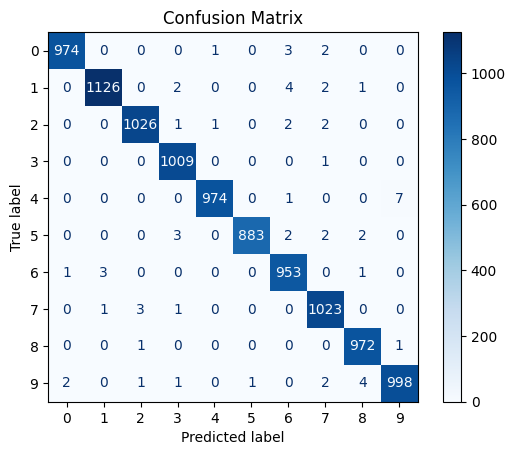


Class-wise Metrics:
Class | Precision | Recall | F1 Score
    0 |      1.00 |   0.99 |     1.00
    1 |      1.00 |   0.99 |     0.99
    2 |      1.00 |   0.99 |     0.99
    3 |      0.99 |   1.00 |     1.00
    4 |      1.00 |   0.99 |     0.99
    5 |      1.00 |   0.99 |     0.99
    6 |      0.99 |   0.99 |     0.99
    7 |      0.99 |   1.00 |     0.99
    8 |      0.99 |   1.00 |     0.99
    9 |      0.99 |   0.99 |     0.99

Macro Averages:
Precision: 0.99
Recall:    0.99
F1 Score:  0.99

Micro Averages:
Precision: 0.99
Recall:    0.99
F1 Score:  0.99


In [ ]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from keras.datasets import mnist # type: ignore
from keras.models import load_model # type: ignore
from keras.utils import to_categorical # type: ignore
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # type: ignore
import seaborn as sns # type: ignore

# Load MNIST test data
(_, _), (x_test, y_test) = mnist.load_data()
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_test_cat = to_categorical(y_test, num_classes=10)

# Load model
model = load_model('model/handwritten.h5')

# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Manual Calculation of Precision, Recall, F1-Score
num_classes = cm.shape[0]
precision_list = []
recall_list = []
f1_list = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)

# Display metrics per class
print("\nClass-wise Metrics:")
print("Class | Precision | Recall | F1 Score")
for i in range(num_classes):
    print(f"{i:5d} | {precision_list[i]:9.2f} | {recall_list[i]:6.2f} | {f1_list[i]:8.2f}")

# Micro & Macro Averages
micro_precision = np.sum([cm[i, i] for i in range(num_classes)]) / np.sum(cm)
micro_recall = micro_precision
micro_f1 = micro_precision

macro_precision = np.mean(precision_list)
macro_recall = np.mean(recall_list)
macro_f1 = np.mean(f1_list)

print("\nMacro Averages:")
print(f"Precision: {macro_precision:.2f}")
print(f"Recall:    {macro_recall:.2f}")
print(f"F1 Score:  {macro_f1:.2f}")

print("\nMicro Averages:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall:    {micro_recall:.2f}")
print(f"F1 Score:  {micro_f1:.2f}")
